## LLMs tutorial

This tutorial will guide you through the basics of using Large Language Models (LLMs) with OpenAI's API. You'll learn how to set up your environment, make API calls, and handle responses.

Ref: https://platform.openai.com/docs/quickstart

First step is to install the OpenAI Python client library. You can do this using pip:

```python
!pip install openai
```

You need to have an OpenAI account and obtain an API key. Set your API key as an environment variable to keep it secure:


In [3]:
# !pip install openapi

In [1]:
from openai import OpenAI
client = OpenAI()

Before you begin, create an API key in the dashboard, which you'll use to securely access the API. 


https://platform.openai.com/api-keys


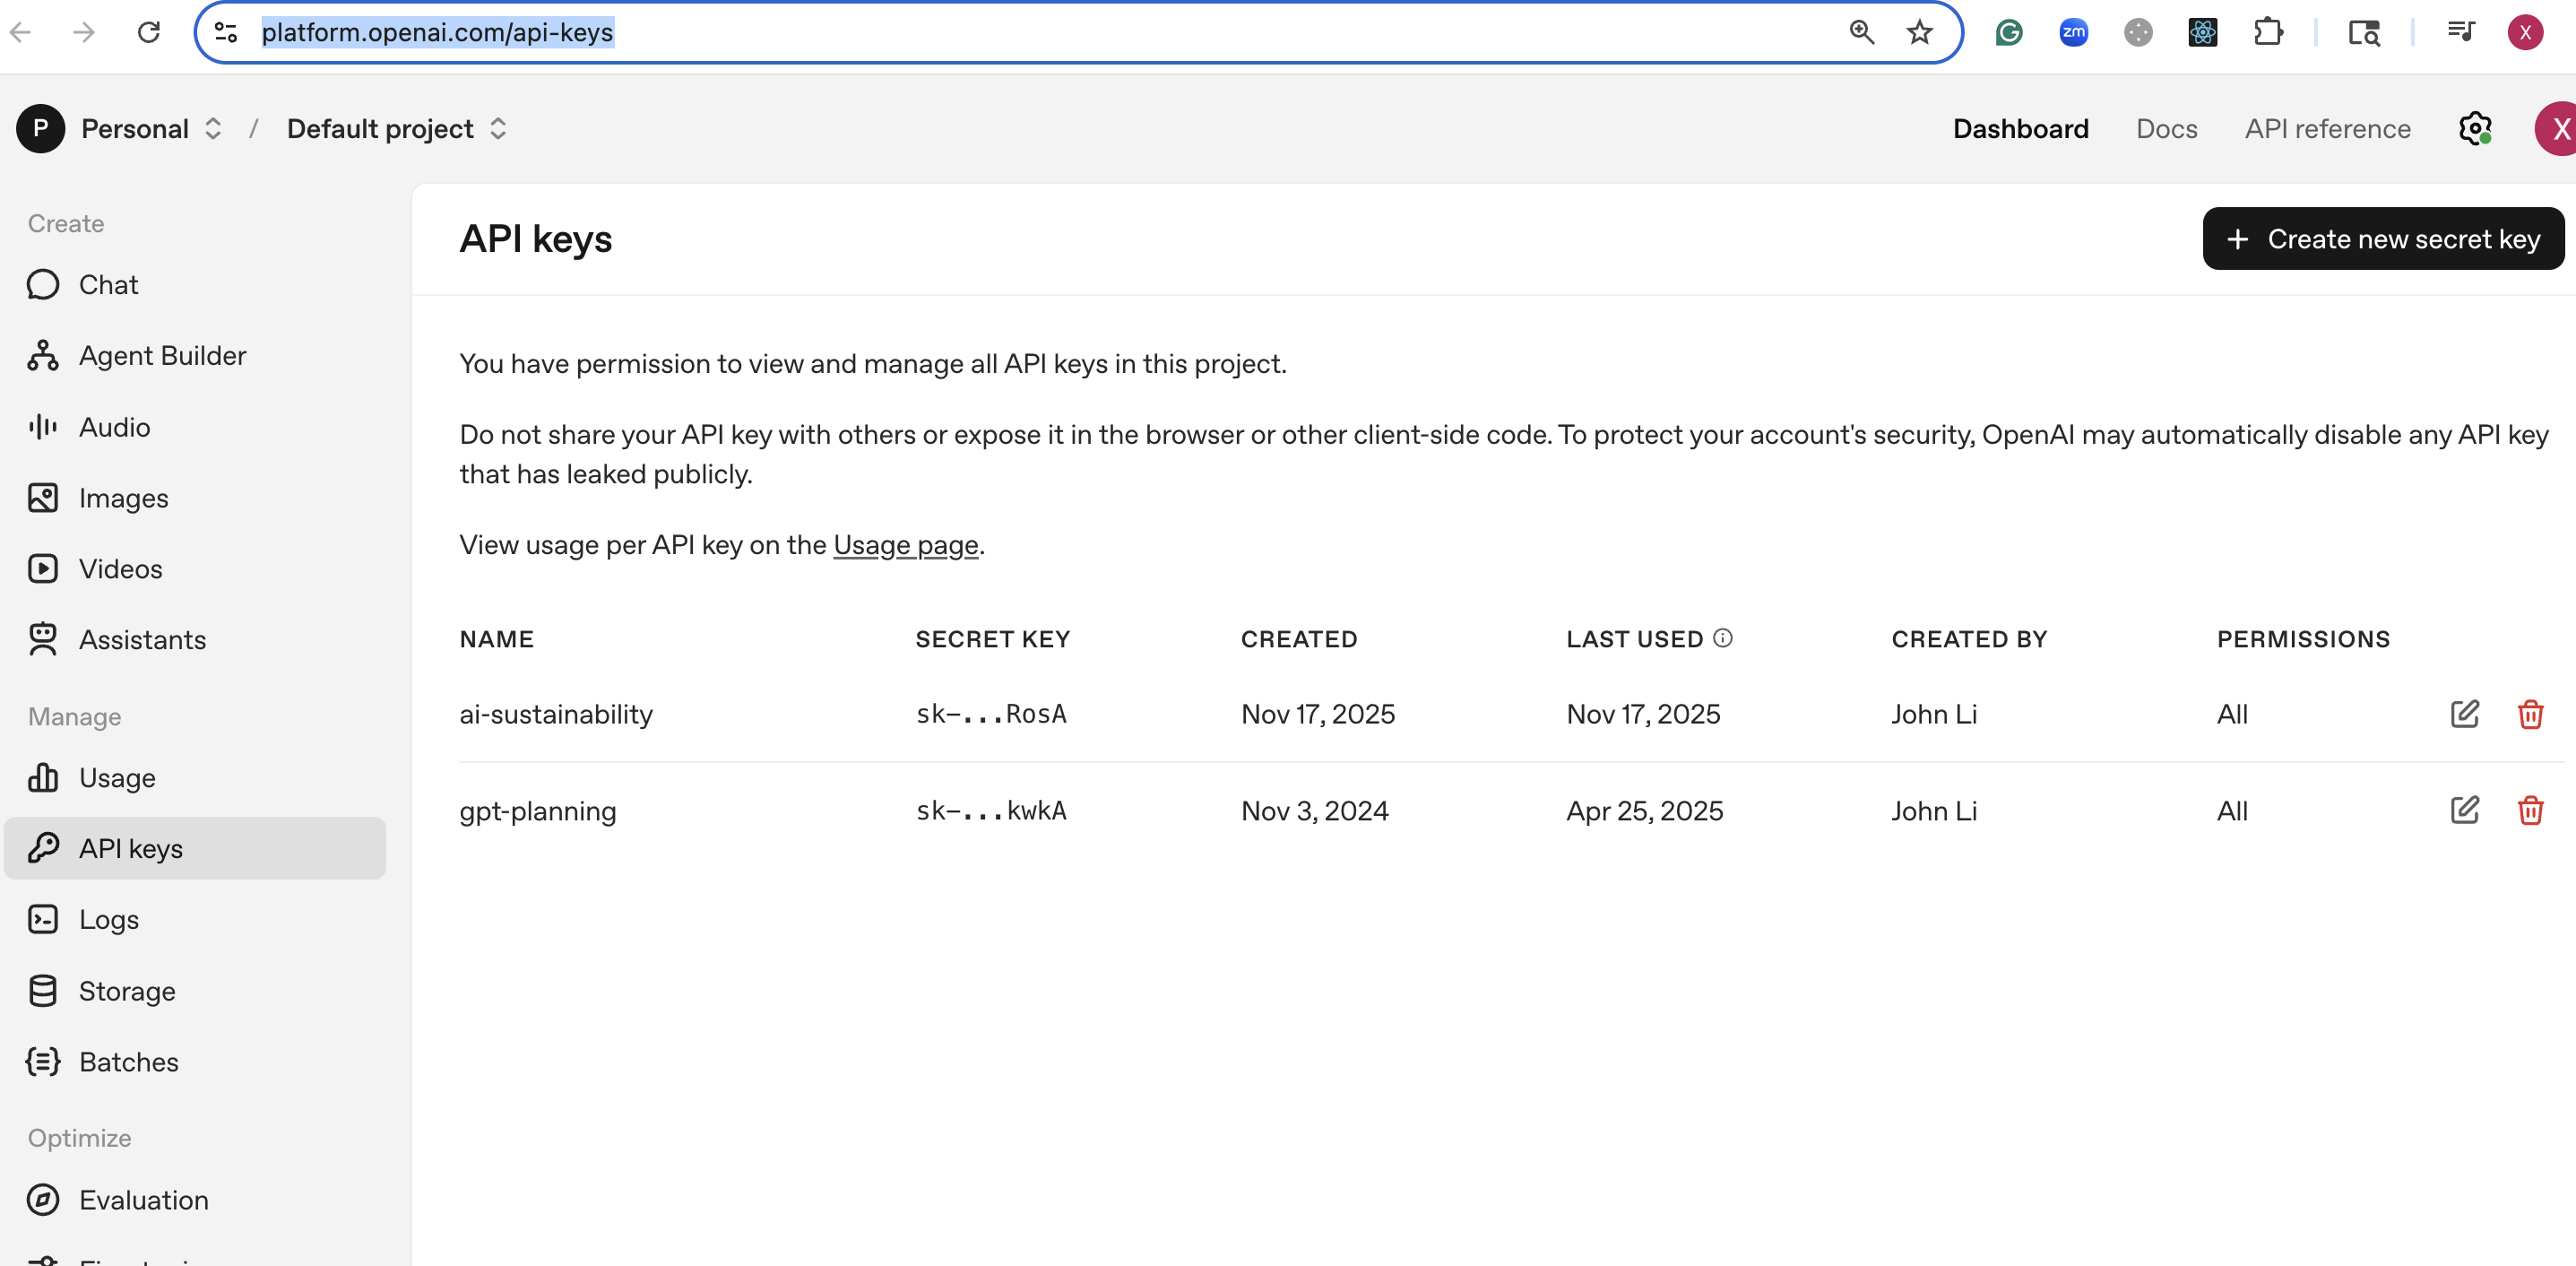


#### Export an environment variable on macOS or Linux systems

For **Windows PowerShell**

```powershell
setx OPENAI_API_KEY "your_api_key_here"
```

for MacOS or Linux systems, run the following command in your terminal:

```bash
export OPENAI_API_KEY="your_api_key_here"
```

Then you can start your `Jupyter Notebook`

In [2]:
from openai import OpenAI
client = OpenAI()

Let's use GPT to write one-sentence bedtime story about a unicorn

In [3]:

response = client.responses.create(
    model="gpt-5-nano",
    input="Write a one-sentence bedtime story about a unicorn."
)

print(response.output_text)

Under a hush of stars, a gentle unicorn curled beside a moonlit stream and drifted into dream-filled sleep, its horn softly lighting the night with lullaby dreams.


### Analyze images and files
Send image URLs, uploaded files, or PDF documents directly to the model to extract text, classify content, or detect visual elements. 

I prepare an image, you can download it [**here**](ohtani.jpg).

In [16]:
import base64
from openai import OpenAI

client = OpenAI()

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "ohtani.jpg"

# Getting the Base64 string
base64_image = encode_image(image_path)


response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                { "type": "input_text", "text": "what's in this image and what is this game?" },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}",
                },
            ],
        }
    ],
)

print(response.output_text)

This image features a baseball player in a Los Angeles Dodgers uniform, with the text "10 K 3 HR" prominently displayed next to him. The "B/R" logo in the upper right indicates that the image is from Bleacher Report, a sports news outlet.

The text "10 K 3 HR" refers to a remarkable baseball achievement: "10 K" means the player struck out 10 batters as a pitcher, and "3 HR" means he hit 3 home runs as a batter in the same game. This is a highly exceptional performance, as it is extremely rare for a player to excel both as a pitcher and a hitter in the same game.

The player in the image appears to represent someone who currently plays for the Los Angeles Dodgers, but I cannot confirm their identity.

**What Game Is This?**
This image references a hypothetical or highlight scenario in Major League Baseball (MLB). No player has ever struck out 10 and hit 3 home runs in the same MLB game as of June 2024. However, it could be a graphic celebrating an outstanding two-way performance by a we

### Sentiment analysis
You can use LLMs to analyze the sentiment of text data. For example, you can classify customer reviews as positive, negative, or neutral.

In [19]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-4o-mini",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_text",
                    "text": (
                        "Analyze the sentiment of the following text. "
                        "Return your answer as a JSON object with keys: sentiment, score, and explanation.\n\n"
                        "Text: 'The app keeps crashing and I'm getting frustrated.'"
                    )
                }
            ]
        }
    ]
)

print(response.output_text)


{
  "sentiment": "negative",
  "score": -2,
  "explanation": "The text expresses dissatisfaction and frustration, which indicates a negative sentiment. The mention of the app crashing implies a problem or issue, further reinforcing the negative feelings."
}


### Batch Sentiment Analysis (multiple texts)
You can also analyze the sentiment of multiple texts in a single API call by sending a list of texts to the model. This example can be further extended to analyze large datasets efficiently, like you download the customer reviews dataset and process them in batches.

In [20]:
texts = [
    "I love this app!",
    "It's okay, nothing special.",
    "This is terrible and slow."
]

for t in texts:
    resp = client.responses.create(
        model="gpt-4o-mini",
        input=[{
            "role": "user",
            "content":[
                {"type": "input_text", "text": 
                    f"Return JSON sentiment for: '{t}'"
                }
            ]
        }]
    )
    print(f"Input: {t}")
    print("Output:", resp.output_text)
    print("----")
    

Input: I love this app!
Output: Here's a JSON representation for the sentiment of the phrase "I love this app!":

```json
{
  "text": "I love this app!",
  "sentiment": {
    "polarity": "positive",
    "confidence": 0.95
  }
}
```

In this example, the sentiment is identified as positive with high confidence.
----
Input: It's okay, nothing special.
Output: Here’s a JSON representation for the sentiment analysis of the phrase "It's okay, nothing special.":

```json
{
  "text": "It's okay, nothing special.",
  "sentiment": {
    "polarity": "neutral",
    "score": 0.0,
    "magnitude": 0.5
  },
  "analysis": {
    "positive": 0.2,
    "neutral": 0.6,
    "negative": 0.2
  }
}
```

### Explanation:
- **Polarity**: Indicates the overall sentiment (neutral in this case).
- **Score**: A numerical value representing sentiment strength (0.0 for neutral).
- **Magnitude**: A measure of the overall strength of sentiment (0.5 suggests a mild sentiment).
- **Breakdown**: Shows the proportion of po

### Extend the model with tools

Give the model access to external data and functions by attaching tools. Use built-in tools like web search or file search, or define your own for calling APIs, running code, or integrating with third-party systems.

In [8]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-5",
    tools=[{"type": "web_search"}],
    input="What was a positive news story from today?"
)

print(response.output_text)

A feel‑good one: Europe’s Copernicus Sentinel‑6B climate satellite launched early today (Monday, Nov 17, 2025) from Vandenberg, California (12:21 a.m. ET / 06:21 CET). It will take over from its twin, Sentinel‑6 Michael Freilich, to provide ultra‑precise sea‑level measurements that help protect coastal communities and improve weather and ocean forecasts. The mission is run by EUMETSAT for the EU’s Copernicus program with partners ESA, NASA, NOAA, and CNES. ([eumetsat.int](https://www.eumetsat.int/successful-launch-copernicus-sentinel-6b?utm_source=openai))

Want more upbeat headlines from today—in science, nature, or something local to you?
